In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')

In [5]:
tips = pd.get_dummies(tips)

In [16]:
cm = tips.corr()
cm[cm['tip'] > 0.4]

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
total_bill,1.000000,0.675734,0.598315,0.144877,-0.144877,0.085721,-0.085721,-0.138174,-0.086168,0.054919,0.122953,-0.183118,0.183118
tip,0.675734,1.000000,0.489299,0.088862,-0.088862,0.005929,-0.005929,-0.095879,-0.055463,-0.002790,0.125114,-0.121629,0.121629
size,0.598315,0.489299,1.000000,0.086195,-0.086195,-0.133178,0.133178,-0.072598,-0.142184,-0.041121,0.193054,-0.103411,0.103411


In [19]:
## Split data into test and train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
X = tips.drop(columns='tip')
y = tips['tip']

In [21]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [22]:
## Fit model or Train Model
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)  # Build model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lr_model.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'coef_': array([ 0.08561436,  0.20932895, -0.00368691,  0.00368691, -0.01595021,
         0.01595021, -0.31037062,  0.24397333, -0.01861437,  0.08501165,
         0.22552999, -0.22552999]),
 '_residues': array([], dtype=float64),
 'rank_': 8,
 'singular_': array([1.27627860e+02, 1.18450483e+01, 1.16556539e+01, 8.98385240e+00,
        8.41980836e+00, 7.55228493e+00, 3.90057509e+00, 1.16531274e+00,
        2.07593236e-15, 1.28730847e-15, 9.37413808e-17, 6.28246213e-17]),
 'intercept_': 0.8577052462290156}

### Evaluate Model 

In [25]:
lr_model.score(X_train,y_train)

0.4344706372862191

In [26]:
## Evaluate Model using test data 
y_pred =lr_model.predict(X_test)

In [27]:
res = pd.DataFrame({'Actual' : y_test, 'Pred' : y_pred})

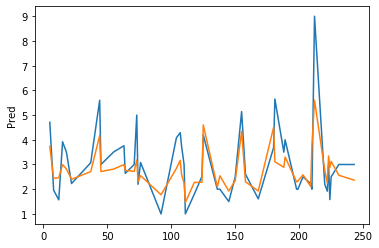

In [37]:
## Draw a graph with actual and predicted lines
sns.lineplot(res.index, res.Actual)
sns.lineplot(res.index,res.Pred)

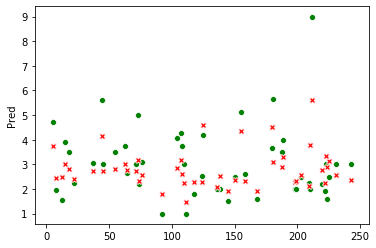

In [50]:
sns.scatterplot(res.index, res.Actual,color='green')
sns.scatterplot(res.index, res.Pred, marker='X',color='red')

In [28]:
res.head(20)

,Actual,Pred
64,2.64,2.759768
63,3.76,2.997126
55,3.51,2.816732
111,1.00,1.463231
225,2.50,3.126549
92,1.00,1.774826
76,3.08,2.546791
181,5.65,3.113591
188,3.50,2.886811
180,3.68,4.501403


In [29]:
## get MSE, R2 and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [30]:
mse = mean_squared_error(y_test,y_pred)
# print(mse)
print(f"Mean Squared Error : {mse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 0.89
Mean Absolute Error : 0.71
R2 Score: 0.55
